# Exploring Puzzle Rating <a name='exploring-puzzle-rating'></a>
---

## Overview

In this notebook, we'll investigate puzzle rating as it relates to puzzle length, number of plays, puzzle themes, and opening tags.

## Contents

1. [Import the required packages and load the data](#import)
2. [Puzzle Length vs. Puzzle Rating](#length-vs-rating)
3. [Number of Plays vs. Puzzle Rating](#plays-vs-rating)
4. [Puzzle Themes vs. Puzzle Rating](#themes-vs-rating)
5. [Opening vs. Puzzle Rating](#opening-vs-rating)


# Import the required packages and load the data <a name='import'></a>
---

## Packages

We'll use the following packages.
- [`pandas`](https://pandas.pydata.org/docs/) for analyzing and processing the data.
- [`rpy2`](https://rpy2.github.io/doc/v3.0.x/html/index.html) for its [`ggplot2`](https://rpy2.github.io/doc/v3.0.x/html/graphics.html#package-ggplot2) visualizations.

In [ ]:
import pandas as pd

!pip install rpy2==3.5.1 #Newer versions of rpy2 were causing issues.

#Activate R magic
%reload_ext rpy2.ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=318083 sha256=b922707bf789c0689458698ad96ce16f169fc40e86d0f8f3186e5c23fec1f747
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


The cell below uses `%%R` to run some `R` code that installs and loads the `tidyverse` and `reshape2` packages needed to create our visualizations with `ggplot2`.

In [ ]:
%%R
install.packages("tidyverse")
install.packages("reshape2")

library("tidyverse")
library("reshape2")

(as ‘lib’ is unspecified)


































	‘/tmp/RtmpBaZcpU/downloaded_packages’

(as ‘lib’ is unspecified)



















	‘/tmp/RtmpBaZcpU/downloaded_packages’


✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’



    smiths




## Load the data

Now let's load the `lichess_db_puzzles_clean.csv` from our data collection and processing efforts in `puzzle_journey_data_collection_processing.ipynb`. Recall, the database is quite large, so this may take a minute to run.

In [ ]:
puzzles_df = pd.read_csv('lichess_db_puzzle_clean.csv')

Now, load the data in the `R` namespace, as well. Note: when trying to use `%Rpush` to transfer the `puzzles_df` to the `R` namespace, the runtime would crash.

In [ ]:
%R puzzles_dfr <- read.csv('lichess_db_puzzle_clean.csv')

,Puzzle_ID,FEN,Moves,Rating,Rating_Deviation,Popularity,Number_of_Plays,Themes,URL,Opening_Tags,Puzzle_Length
1,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1925,74,95,3136,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,,5
2,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1518,75,96,19577,advantage endgame short,https://lichess.org/F8M8OS71#53,,3
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1172,75,86,538,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...,3
4,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1565,81,89,80,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,,5
5,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1520,75,100,169,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,,3
...,...,...,...,...,...,...,...,...,...,...,...
3157076,zzzYp,3r1rk1/3pN1pp/nq3pn1/1pp1p1QN/4P3/5P2/2P3PP/3R...,g8h8 e7g6 h7g6 g5g6,1058,77,89,590,crushing kingsideAttack middlegame short,https://lichess.org/Yc8Fdtc0/black#52,,3
3157077,zzzc4,3r3k/p5pp/8/5R2/1BQ1p3/P3q3/Bb4PP/6K1 w - - 0 28,g1f1 d8d1 b4e1 e3e1,1022,75,89,364,mate mateIn2 middlegame short,https://lichess.org/jRTmvh6y#55,,3
3157078,zzzco,5Q2/pp3R1P/1kpp4/4p3/2P1P3/3PP2P/Pr2q3/2K5 w -...,f7f2 b2c2 c1b1 e2d1,1711,75,88,1076,endgame mate mateIn2 queensideAttack short,https://lichess.org/hZWTYIAT#69,,3
3157079,zzzhI,r3kb1r/ppp2ppp/2n5/3q3b/3P1B2/5N1P/PPP3P1/RN1Q...,c6d4 f1e1 e8d8 b1c3 d4f3 g2f3,2492,88,82,62,advantage long opening,https://lichess.org/N092KH4f/black#20,Kings_Gambit_Accepted Kings_Gambit_Accepted_Ab...,5


# Puzzle Length vs. Puzzle Rating <a name='length-vs-rating'></a>

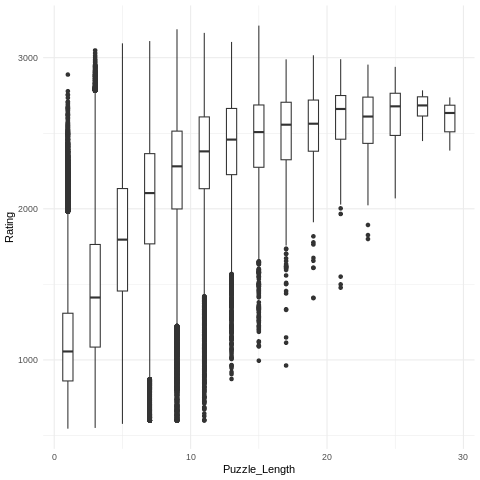

In [ ]:
%%R
ggplot(puzzles_dfr, aes(x = Puzzle_Length, y = Rating))+
  geom_boxplot(aes(group = cut_width(Puzzle_Length, 1)))+
  theme_minimal()

As puzzle length increases, so does the median puzzle rating (so, as one might expect, longer puzzles tend to be more difficult). The trend appears to level out between `10` and `20` moves—so, at some point, increasing the number of moves has diminishing returns on median puzzle rating.

# Number of Plays vs. Puzzle Rating <a name='plays-vs-rating'></a>

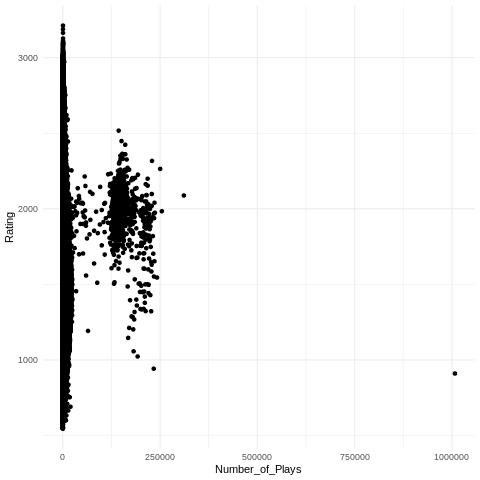

In [ ]:
%%R
ggplot(puzzles_dfr, aes(x = Number_of_Plays, y = Rating)) + 
  geom_point() + 
  theme_minimal()

It appears that, as the number of plays increases, the rating range gets smaller. This can be visualized slightly differently below (note we exlude the puzzle with over a million plays).

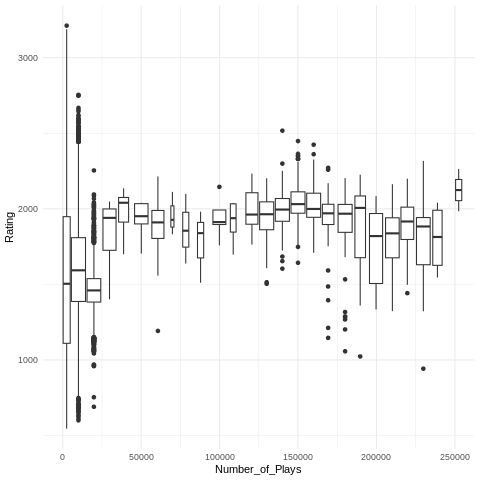

In [ ]:
%%R
ggplot(puzzles_dfr, aes(x = Number_of_Plays, y = Rating))+
  geom_boxplot(aes(group = cut_width(Number_of_Plays, 10000)))+
  coord_cartesian(xlim=c(0,250000))+
  theme_minimal()

# Puzzle Themes vs. Puzzle Rating <a name='themes-vs-rating'></a>

In the `Themes` column is a space-separated string describing the sort of tactic(s) in a particular puzzle. These are refined by users after completing a puzzle. The list of puzzle themes is available [here](https://github.com/lichess-org/lila/blob/master/translation/source/puzzleTheme.xml). Below, we put these themes into a `Python` list.

In [ ]:
theme_categories = ['advancedPawn', 'advantage', 'anastasiaMate', 'arabianMate', 'attackingF2F7',
                    'attraction', 'backRankMate', 'bishopEndgame', 'bodenMate', 'castling',
                    'capturingDefender', 'crushing', 'doubleBishopMate', 'dovetailMate', 'equality',
                    'kingsideAttack', 'clearance', 'defensiveMove', 'deflection', 'discoveredAttack',
                    'doubleCheck', 'endgame', 'enPassant', 'exposedKing', 'fork',
                    'hangingPiece', 'hookMate', 'interference', 'intermezzo', 'knightEndgame', 
                    'long', 'master', 'masterVsMaster', 'mate', 'mateIn1', 
                    'mateIn2', 'mateIn3', 'mateIn4', 'mateIn5', 'middlegame',
                    'oneMove', 'opening', 'pawnEndgame', 'pin', 'promotion',
                    'queenEndgame', 'queenRookEndgame', 'queensideAttack', 'quietMove', 'rookEndgame',
                    'sacrifice', 'short', 'skewer', 'smotheredMate', 'superGM', 
                    'trappedPiece', 'underPromotion', 'veryLong', 'xRayAttack', 'zugzwang',
                    'healthyMix', 'playerGames']

The function below returns a dataframe containing only the puzzles related to a particular theme.

In [ ]:
def theme_filter(theme):
  #Set the search condition in `mask` to look for the string `theme` in the `Themes` column.
  mask = puzzles_df['Themes'].str.contains(theme, case = True, na = False, regex = False)
  #Return the dataframe containing only puzzles with the specified `theme` in `Themes` column. 
  #We cast `Opening_Tags` as a `string` to avoid encoding errors when passing to `R`.
  return puzzles_df[mask].astype({'Opening_Tags': 'str'})

The input `theme` can take any of the values from `theme_categories` above. 

## Endgame puzzles

For example, let's look at the distribution of `endgame` puzzles. First, filter the `puzzles_df` for these puzzles using the `theme_filter()` function defined above.

In [ ]:
endgame_puzzles = theme_filter('endgame')

endgame_puzzles.head()

,Puzzle_ID,FEN,Moves,Rating,Rating_Deviation,Popularity,Number_of_Plays,Themes,URL,Opening_Tags,Puzzle_Length
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1518,75,96,19577,advantage endgame short,https://lichess.org/F8M8OS71#53,nan,3
3,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1565,81,89,80,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,nan,5
4,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1520,75,100,169,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,nan,3
8,000rO,3R4/8/K7/pB2b3/1p6/1P2k3/3p4/8 w - - 4 58,a6a5 e5c7 a5b4 c7d8,1039,80,85,61,crushing endgame fork short,https://lichess.org/tzeeBEc2#115,nan,3
9,000tp,4r3/5pk1/1p3np1/3p3p/2qQ4/P4N1P/1P3RP1/7K w - ...,d4b6 f6e4 h1g1 e4f2,2051,75,81,113,crushing endgame short trappedPiece,https://lichess.org/GeXqsW90#67,nan,3


We can extract just the rating column to make the pass to `R` go a little more smoothly.


In [ ]:
endgame_puzzles_ratings = endgame_puzzles[['Rating']]

Now, push this dataframe to the `R` namespace and plot the distribution of ratings.

In [ ]:
%Rpush endgame_puzzles_ratings

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


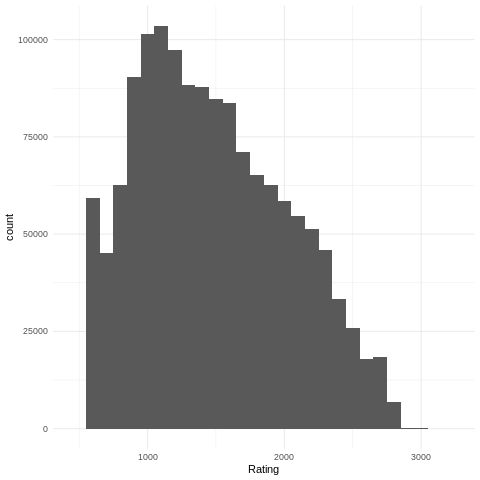

In [ ]:
%%R
ggplot(endgame_puzzles_ratings, aes(x = Rating)) +
  geom_histogram(binwidth = 100) +
  theme_minimal()

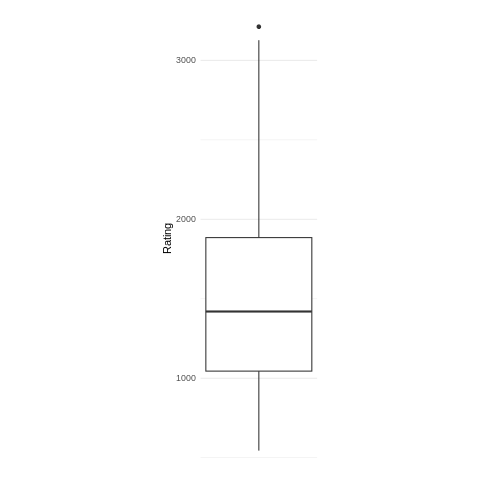

In [ ]:
%%R
ggplot(endgame_puzzles_ratings)+
  geom_boxplot(aes(y = Rating))+
  theme_minimal()+
  theme(panel.grid.minor.x = element_blank(), 
        panel.grid.major.x = element_blank(), 
        axis.text.x = element_blank(), 
        aspect.ratio = 4)

We see that endgame puzzles have a slightly right-skewed rating distribution with a median rating just below `1,500`.

## All themes

Now let's see how puzzle ratings compare across themes. First, we gather a list containing the puzzle rating data corresponding to each theme.

In [ ]:
theme_ratings_list = []
for theme in theme_categories:
  theme_ratings_list.append(theme_filter(theme)['Rating'].tolist())

We then form a dictionary whose keys are the puzzle themes and whose values is the list of puzzle ratings corresponding to that theme.

In [ ]:
theme_ratings_dictionary = dict(zip(theme_categories, theme_ratings_list))

Now transform this dictionary into a dataframe that we'll be able to manipulate with `ggplot`. We drop the `healthyMix` and `playerGames` columns since they contain no data.

In [ ]:
theme_ratings_df = pd.DataFrame.from_dict(theme_ratings_dictionary, orient = 'index')
theme_ratings_df = theme_ratings_df.transpose()
theme_ratings_df.drop(columns=['healthyMix', 'playerGames'], inplace = True)
theme_ratings_df.head()

,advancedPawn,advantage,anastasiaMate,arabianMate,attackingF2F7,attraction,backRankMate,bishopEndgame,bodenMate,castling,...,sacrifice,short,skewer,smotheredMate,superGM,trappedPiece,underPromotion,veryLong,xRayAttack,zugzwang
0,1495.0,1518.0,668.0,2005.0,2063.0,1495.0,1128.0,938.0,945.0,1944.0,...,1768.0,1518.0,1189.0,1606.0,1189.0,2051.0,2784.0,1729.0,1383.0,2265.0
1,1174.0,1172.0,1536.0,1176.0,2205.0,1764.0,1606.0,2358.0,989.0,1974.0,...,1729.0,1172.0,1165.0,1437.0,1764.0,1594.0,2214.0,2152.0,1420.0,2387.0
2,1931.0,1430.0,1598.0,1655.0,2470.0,1498.0,642.0,2617.0,600.0,2043.0,...,1902.0,1520.0,1097.0,1301.0,1043.0,2227.0,2761.0,2208.0,1281.0,2125.0
3,2317.0,1725.0,705.0,1008.0,2019.0,1522.0,628.0,1344.0,913.0,2687.0,...,2208.0,1430.0,2208.0,825.0,952.0,1313.0,1916.0,2352.0,1287.0,1752.0
4,923.0,2626.0,1600.0,765.0,2465.0,2267.0,656.0,1635.0,1083.0,2039.0,...,1764.0,1554.0,806.0,997.0,1593.0,1674.0,1983.0,2013.0,2399.0,2011.0


As much as I wanted to plot this data in `ggplot2`, it would required melting it first—this results in a very large dataset that crahses the runtime when read with `R` magic.

Below is a plot using `.boxplot()`.

<Axes: >

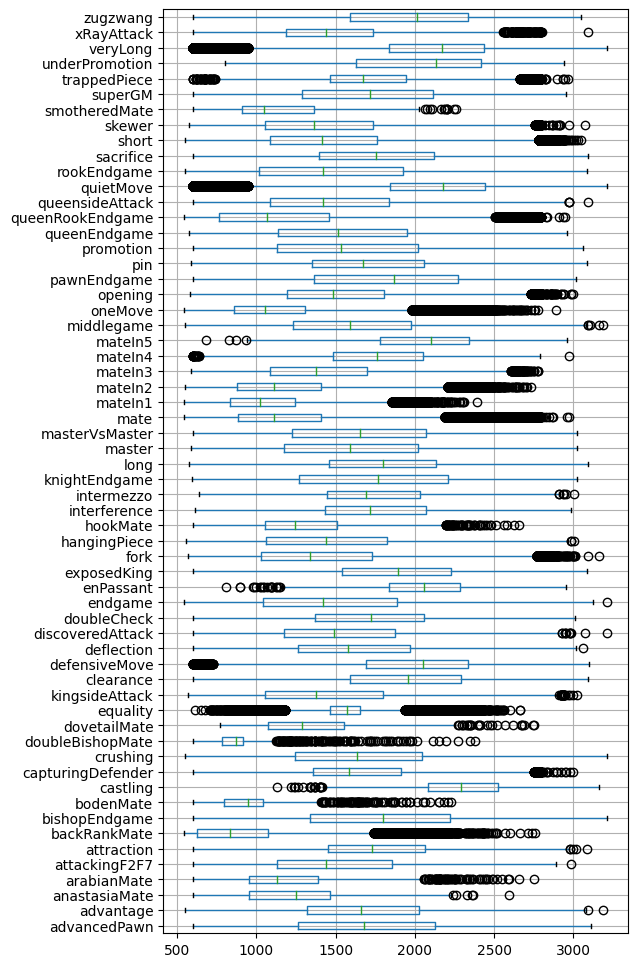

In [ ]:
theme_ratings_df.boxplot(vert = False, figsize = (6,12))

Themes `zugzwang`, `veryLong`, `underPromotion`, `quiteMove`, `mateIn5`, `enPassant`, `defensiveMove`, and `castling` appear to have relatively high median ratings. These are all themes that involve either relatively long puzzles or moves that are subtle, rare, or otherwise non-routine.

Perhaps unsurprisingly, `bankRankMate` has the lowest median rating—these sorts of puzzles are generally considered to be easy.

### Processing theme data for use with `R`

I'd still like to plot this with `R` (just for fun). To do so, we'll need to melt it first. We could use `R`'s `melt()` function, but here we use `melt()` from `pandas` on the dataframe so that each column is interpreted as a collection of observations on the variable `Theme`. 

In [ ]:
melted_theme_ratings_df = theme_ratings_df.melt(id_vars = None, 
                                                var_name = 'Theme', 
                                                value_name = 'Rating')

melted_theme_ratings_df.head()

,Theme,Rating
0,advancedPawn,1495.0
1,advancedPawn,1174.0
2,advancedPawn,1931.0
3,advancedPawn,2317.0
4,advancedPawn,923.0


We now save the melted data from for use with `R`.

In [ ]:
melted_theme_ratings_df.to_csv('melted_theme_ratings.csv')

# Opening vs. Puzzle Rating <a name='opening-vs-rating'></a>

First, let's generate a list of openings. First, let's create a dataframe of only puzzles with opening tags. To do this, we just need to drop the missing values from `puzzles_df`, since the only missing values in this dataframe are in the `Opening_Tags` colum

In [ ]:
opening_puzzles_df = puzzles_df.dropna()

opening_puzzles_df.head()

,Puzzle_ID,FEN,Moves,Rating,Rating_Deviation,Popularity,Number_of_Plays,Themes,URL,Opening_Tags,Puzzle_Length
2,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1172,75,86,538,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...,3
5,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/...,g5e7 a5c3 b2c3 c6e7,1430,77,71,493,advantage master middlegame short,https://lichess.org/iihZGl6t#29,Benoni_Defense Benoni_Defense_Benoni-Indian_De...,3
6,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3...,e8f7 e2e6 f7f8 e6f7,1554,75,89,465,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,Horwitz_Defense Horwitz_Defense_Other_variations,3
10,00143,r2q1rk1/5ppp/1np5/p1b5/2p1B3/P7/1P3PPP/R1BQ1RK...,d8f6 d1h5 h7h6 h5c5,1725,75,91,1944,advantage middlegame short,https://lichess.org/jcuxlI63/black#34,Scotch_Game Scotch_Game_Mieses_Variation,3
14,001gi,r6r/1pNk1ppp/2np4/b3p3/4P1b1/N1Q5/P4PPP/R3KB1R...,c7a8 a5c3,945,153,52,154,bodenMate hangingPiece mate mateIn1 middlegame...,https://lichess.org/1sV2Hr22#35,Sicilian_Defense Sicilian_Defense_Other_variat...,1


Now, extract the columns of interest, namely `Rating` and `Opening_Tags`.

In [ ]:
opening_rating_df = opening_puzzles_df[['Rating','Opening_Tags']]

opening_rating_df.head()

,Rating,Opening_Tags
2,1172,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...
5,1430,Benoni_Defense Benoni_Defense_Benoni-Indian_De...
6,1554,Horwitz_Defense Horwitz_Defense_Other_variations
10,1725,Scotch_Game Scotch_Game_Mieses_Variation
14,945,Sicilian_Defense Sicilian_Defense_Other_variat...


Next, we'll replace the `Opening_Tags` column in `opening_rating_df` with just the the first item from the space-separated list in `Opening_Tags`. This means we'll only be considering the basic opening—we won't be investigating variations, since there are a *lot* of variations.

In [ ]:
opening_rating_df['Opening_Tags'] = opening_rating_df['Opening_Tags'].map(lambda x: x.split()[0])

opening_rating_df.head()

<ipython-input-8-97ba2e98882c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opening_rating_df['Opening_Tags'] = opening_rating_df['Opening_Tags'].map(lambda x: x.split()[0])


,Rating,Opening_Tags
2,1172,Kings_Pawn_Game
5,1430,Benoni_Defense
6,1554,Horwitz_Defense
10,1725,Scotch_Game
14,945,Sicilian_Defense


Let's puzh `opening_rating_df` to the `R` namespace.

In [ ]:
%Rpush opening_rating_df

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


We can now plot the data.

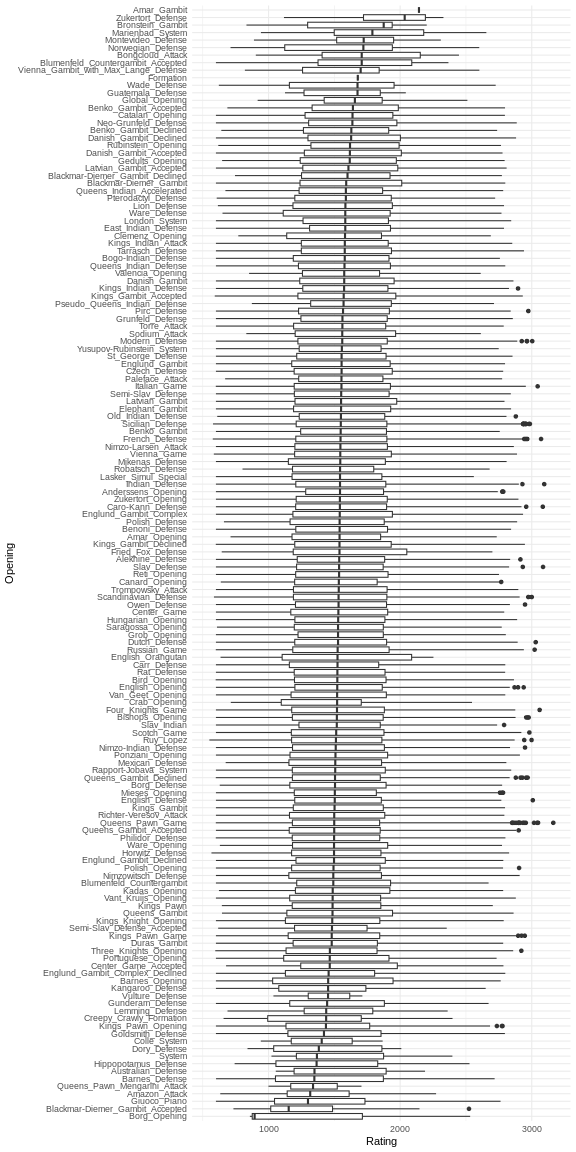

In [ ]:
%%R -h 16 -w 8 -u in
ggplot(opening_rating_df, 
       aes(y = reorder(Opening_Tags, Rating, FUN = median, na.rm = TRUE), x = Rating))+
  labs(y = "Opening")+
  geom_boxplot()+
  theme_minimal()

The median rating is pretty consistent across openings. The `Zukertort_Defense`  and `Amar_Gambit` are the only openings with a median rating over `2,000`, while the `Borg_Opening` is the only opening with a median rating under `1,000`.